In [1]:
import json

from torch.nn.quantized.functional import threshold

with open('../data/output/lanier_qi_match/detection_raw.json') as f:
    d = json.load(f)    

/home/dabi/miniconda3/envs/e2etad/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pred_segs = []
for i, (video_id, segs) in enumerate(d['results'].items()):
    for seg in segs:
        start = seg['segment'][0]
        end = seg['segment'][1]
        score = seg['score']
        pred_segs.append({'video_id': video_id,
                          'start': start,
                          'end': end,
                          'score': score})

In [3]:
import pandas as pd

df = pd.DataFrame(pred_segs)
df

,video_id,start,end,score
0,lanier_qi_000,13.273894,18.472301,0.939411
1,lanier_qi_000,17.826180,19.804253,0.031449
2,lanier_qi_000,12.896260,18.177935,0.013308
3,lanier_qi_000,7.744884,10.363749,0.013253
4,lanier_qi_000,23.604519,29.459990,0.935672
...,...,...,...,...
1315,lanier_qi_032,180.214237,185.131889,0.060906
1316,lanier_qi_033,13.258145,16.969303,0.928833
1317,lanier_qi_033,13.845067,17.030413,0.075975
1318,lanier_qi_033,18.880171,20.624619,0.054611


In [4]:
threshold = 0.0
df_threshold = df[df['score'] > threshold]

In [5]:
def ss_to_mmss(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes:02}:{seconds:02}"


# Create a new column with the mm:ss format
df_threshold['start_mmss'] = df_threshold['start'].apply(ss_to_mmss)
df_threshold['end_mmss'] = df_threshold['end'].apply(ss_to_mmss)

In [6]:
df_threshold['score']

0       0.939411
1       0.031449
2       0.013308
3       0.013253
4       0.935672
          ...   
1315    0.060906
1316    0.928833
1317    0.075975
1318    0.054611
1319    0.019623
Name: score, Length: 1320, dtype: float64

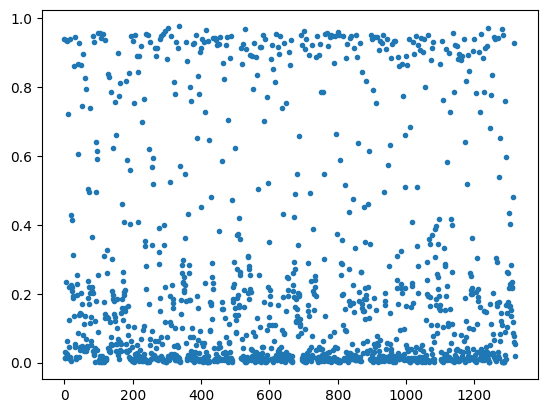

In [7]:
import matplotlib.pyplot as plt
plt.plot(df_threshold['score'], ".")

In [ ]:
# manual, by eys
# based on ground truth x = 0.5, 0.6 -> y = AP0.95
# 
# otsu method